### Beta

* Beta is a measure of a stock's volatility in relation to the overall market.
* S&P 500 Index has a beta of 1.0
* High-beta stocks are supposed to be riskier but provide higher return potential.
* Low-beta stocks pose less risk but also lower returns.

##### Formula

* Beta = Covariance / Variance

##### Interpretation

* Beta above 1: stock is more volatile than the market, but expects higher return.
* Beta below 1: stocke with lower volatility, and expects less return.

##### Resources

* Beta: https://www.investopedia.com/investing/beta-know-risk/

In [5]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [6]:
import yfinance as yf
yf.pdr_override()

In [46]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
start = dt.datetime(2015,12,1)
end = dt.datetime(2021, 2,1)
data = pdr.get_data_yahoo(['AAPL','MSFT','BABA','IBM','^GSPC'], start, end, interval = "1mo")

[*********************100%***********************]  5 of 5 completed


In [47]:
data = data['Adj Close']

In [48]:
data

,AAPL,BABA,IBM,MSFT,^GSPC
Date,,,,,
2015-12-01,24.054173,81.269997,94.837914,49.616077,2043.939941
2016-01-01,22.244282,67.029999,85.996391,49.267292,1940.239990
2016-02-01,22.095745,68.809998,90.296555,45.502254,1932.229980
2016-03-01,25.041708,79.029999,105.434639,49.747128,2059.739990
2016-04-01,21.537846,76.940002,101.598763,44.919235,2065.300049
...,...,...,...,...,...
2020-09-01,114.065010,293.980011,102.744133,205.590790,3363.000000
2020-10-01,107.219742,304.690002,94.291191,197.907852,3269.959961
2020-11-01,117.256203,263.359985,104.306358,209.246475,3621.629883


In [49]:
log_returns = np.log(data/data.shift())

In [50]:
log_returns

,AAPL,BABA,IBM,MSFT,^GSPC
Date,,,,,
2015-12-01,NaN,NaN,NaN,NaN,NaN
2016-01-01,-0.078223,-0.192637,-0.097864,-0.007055,-0.052068
2016-02-01,-0.006700,0.026209,0.048794,-0.079499,-0.004137
2016-03-01,0.125158,0.138478,0.154992,0.089191,0.063905
2016-04-01,-0.150731,-0.026802,-0.037060,-0.102087,0.002696
...,...,...,...,...,...
2020-09-01,-0.106370,0.023925,-0.000381,-0.067361,-0.040018
2020-10-01,-0.061888,0.035783,-0.085854,-0.038086,-0.028056
2020-11-01,0.089481,-0.145773,0.100945,0.055711,0.102146


In [52]:
cov = log_returns.cov()

In [53]:
var = log_returns['^GSPC'].var()

In [54]:
cov.loc['AAPL','^GSPC']/var

1.2545573556714296

In [56]:
cov.loc['^GSPC']/var

AAPL     1.254557
BABA     0.978355
IBM      1.249102
MSFT     0.797269
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [57]:
X = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
Y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(X, Y)

lin_regr.coef_[0, 0]

1.2545573556714291

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

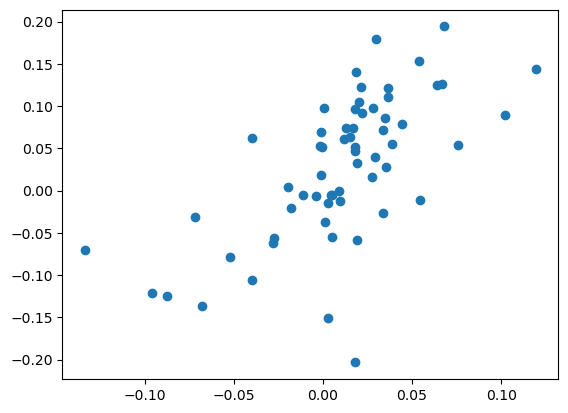

In [59]:
fig, ax = plt.subplots()
ax.scatter(X, Y)